# Plot SatScan Results

Import libraries

In [1]:
import sys
import os
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import geoplot
import mapclassify
sys.path.append(os.path.abspath('..'))
%matplotlib inline

Read files

In [2]:
gd = gpd.read_file("../PySal/municipios/BRMUE250GC_SIR.shp")
gdf = gpd.read_file('output_spatial_analysis_2018/Suicide-SAT.col.shp')

Filter gdf to remove clusters with p-value < 0.05

In [3]:
gdf = gdf[gdf['P_VALUE'] < 0.05]

In [4]:
gdf

,CLUSTER,LOC_ID,LATITUDE,LONGITUDE,RADIUS,START_DATE,END_DATE,NUMBER_LOC,LLR,P_VALUE,OBSERVED,EXPECTED,ODE,REL_RISK,POPULATION,GINI_CLUST,geometry
0,1.0,432375,-28.35,-54.49,879.130387,2018/1/1,2018/12/31,1452.0,382.550766,1.000000e-17,3467.0,2210.391024,1.568501,1.782344,36333590.0,F,"POLYGON ((-54.49000 -20.43882, -54.34312 -20.4..."
1,2.0,430187,-30.20,-57.55,954.633011,2018/1/1,2018/12/31,1096.0,378.136652,1.000000e-17,2576.0,1490.721891,1.728022,1.913557,24503935.0,T,"POLYGON ((-57.55000 -21.60939, -57.38934 -21.6..."
2,3.0,351380,-23.68,-46.62,25.520590,2018/1/1,2018/12/31,13.0,303.925271,1.000000e-17,347.0,1000.400357,0.346861,0.328490,16444211.0,T,"POLYGON ((-46.62000 -23.45034, -46.61563 -23.4..."
3,4.0,291360,-14.78,-39.04,396.431873,2018/1/1,2018/12/31,340.0,102.428152,1.000000e-17,384.0,726.312062,0.528698,0.513985,11938849.0,T,"POLYGON ((-39.04000 -11.21256, -38.97657 -11.2..."
4,5.0,330070,-22.87,-42.01,180.231346,2018/1/1,2018/12/31,94.0,76.777200,1.000000e-17,626.0,974.998641,0.642052,0.623469,16026667.0,T,"POLYGON ((-42.01000 -21.24812, -41.97963 -21.2..."
5,6.0,210290,-1.19,-46.02,498.826694,2018/1/1,2018/12/31,252.0,73.506300,1.000000e-17,401.0,687.026289,0.583675,0.570083,11293084.0,T,"POLYGON ((-46.02000 3.29887, -45.94161 3.29819..."
6,7.0,220820,-6.83,-40.57,350.524727,2018/1/1,2018/12/31,446.0,61.399867,1.000000e-17,816.0,545.016949,1.497201,1.531387,8958787.0,T,"POLYGON ((-40.57000 -3.67567, -40.51486 -3.676..."
7,8.0,311160,-21.23,-45.75,179.858530,2018/1/1,2018/12/31,261.0,60.322647,1.000000e-17,540.0,326.094697,1.655961,1.685129,5360224.0,T,"POLYGON ((-45.75000 -19.61148, -45.72002 -19.6..."
8,9.0,314460,-21.23,-45.23,141.428257,2018/1/1,2018/12/31,161.0,50.836858,1.100000e-16,325.0,176.455607,1.841823,1.863960,2900512.0,F,"POLYGON ((-45.23000 -19.95731, -45.20637 -19.9..."
9,10.0,260680,-7.83,-34.90,231.383209,2018/1/1,2018/12/31,329.0,50.703317,2.200000e-16,587.0,856.327763,0.685485,0.670224,14075999.0,T,"POLYGON ((-34.90000 -5.74781, -34.86349 -5.748..."


Plot results and save to figure

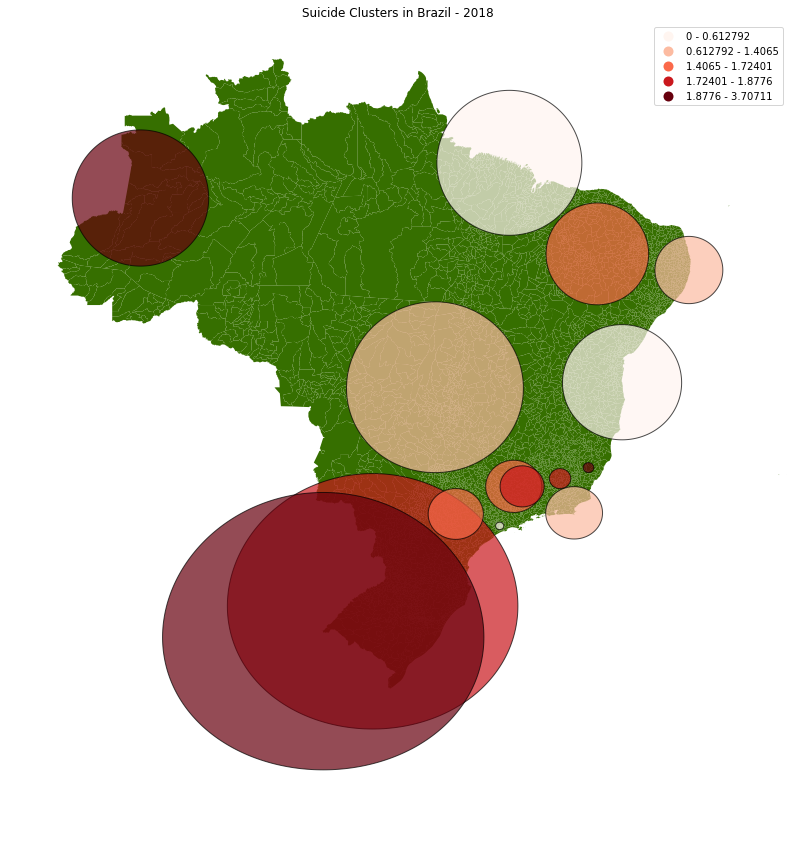

In [5]:
fig, ax = plt.subplots(figsize=(15,15))
gd.plot(ax=ax, color="#366f00")
scheme = mapclassify.Quantiles(gdf["REL_RISK"], k=5)
geoplot.choropleth(
    gdf, hue=gdf["REL_RISK"], scheme=scheme,
    cmap='Reds', ax=ax, legend=True, alpha=0.7
)
plt.title("Suicide Clusters in Brazil - 2018")
plt.savefig('clusters_spatial_analysis_2018.png')

Let's highlight the municipalities inside the clusters.

Read GIS file:

In [6]:
gis = gpd.read_file('output_spatial_analysis_2018/Suicide-SAT.gis.shp')

Filter GIS to remove clusters with p-value < 0.05:

In [7]:
gis = gis[gis['P_VALUE'] < 0.05]

In [8]:
gis.head()

,LOC_ID,CLUSTER,P_VALUE,CLU_OBS,CLU_EXP,CLU_ODE,CLU_RR,CLU_POP,LOC_OBS,LOC_EXP,LOC_ODE,LOC_RR,LOC_POP,LOC_LAT,LOC_LONG,GINI_CLUST,geometry
0,432375,1.0,1.000000e-17,3467.0,2210.391024,1.568501,1.782344,36333590.0,0.0,0.193276,0.000000,0.000000,3177.0,-28.35,-54.49,F,POINT (-54.49000 -28.35000)
1,430330,1.0,1.000000e-17,3467.0,2210.391024,1.568501,1.782344,36333590.0,0.0,0.295420,0.000000,0.000000,4856.0,-28.28,-54.63,F,POINT (-54.63000 -28.28000)
2,431217,1.0,1.000000e-17,3467.0,2210.391024,1.568501,1.782344,36333590.0,0.0,0.101292,0.000000,0.000000,1665.0,-28.25,-54.61,F,POINT (-54.61000 -28.25000)
3,430693,1.0,1.000000e-17,3467.0,2210.391024,1.568501,1.782344,36333590.0,1.0,0.519661,1.924330,1.924403,8542.0,-28.36,-54.26,F,POINT (-54.26000 -28.36000)
4,431750,1.0,1.000000e-17,3467.0,2210.391024,1.568501,1.782344,36333590.0,2.0,4.722092,0.423541,0.423450,77620.0,-28.29,-54.26,F,POINT (-54.26000 -28.29000)


In [9]:
gis[gis['CLU_RR'] > 1.].shape, gis[gis['CLU_RR'] < 1.].shape

((4194, 17), (1030, 17))

In [10]:
def remove_last_digit(x):
    return np.floor(x.astype(int) / 10).astype(int)

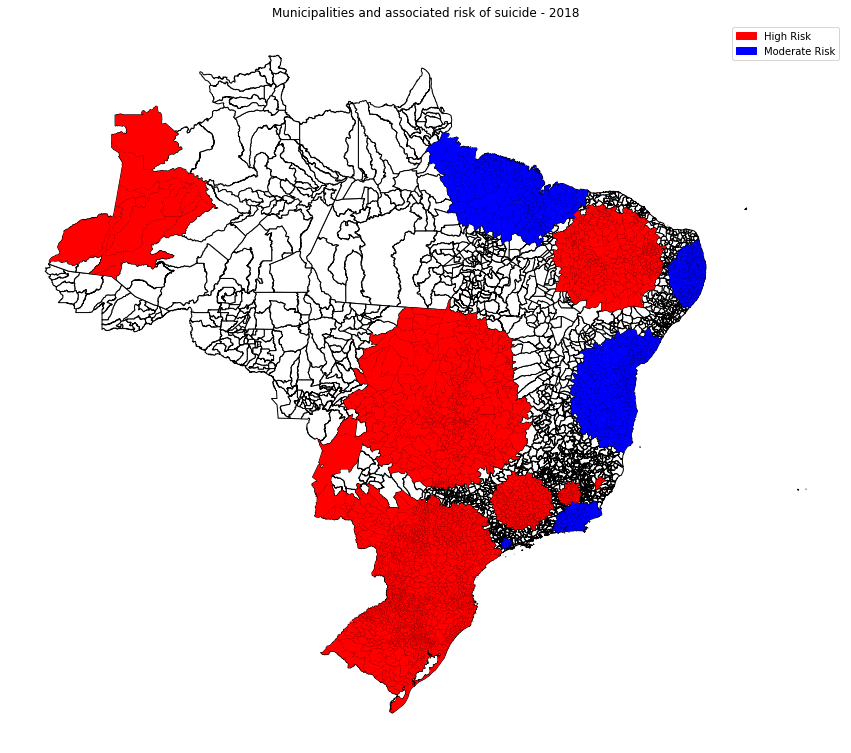

In [11]:
fig, ax = plt.subplots(figsize=(15,15))
gd.plot(ax=ax, color="white", edgecolor='black')

mun_risk_ids = gis[gis['CLU_RR'] > 1.0]['LOC_ID'].astype(int).tolist()
gd_risk = gd[remove_last_digit(gd['CD_GEOCMU']).apply(lambda x: x in mun_risk_ids)]
plot_risk = gd_risk.plot(ax=ax, color="red")

mun_moderate_ids = gis[gis['CLU_RR'] < 1.0]['LOC_ID'].astype(int).tolist()
gd_moderate = gd[remove_last_digit(gd['CD_GEOCMU']).apply(lambda x: x in mun_moderate_ids)]
plot_moderate = gd_moderate.plot(ax=ax, color="blue")

red_patch = mpatches.Patch(color='red', label='High Risk')
blue_patch = mpatches.Patch(color='blue', label='Moderate Risk')
plt.legend(handles=[red_patch, blue_patch])
plt.axis('off')
plt.title("Municipalities and associated risk of suicide - 2018")
plt.savefig('municipalities_risk_2018.png')

Creating a dataframe where for each city we define a variable RISK:

- RISK = 1 - this city belongs to a high risk cluster
- RISK = 0 - this city does not belong to a high risk cluster

In [1]:
import pandas as pd
population = pd.read_csv("POPULATION_15_17.csv", index_col=[0])
population["RISK"] = [1 if x in mun_risk_ids else 0 for x in population["MUNCOD"]]
population = population[["MUNCOD","RISK"]]
population.to_csv('muncod_risk_2015_to_2017.csv')

,POPULATION,MUNCOD,YEAR
0,25437,110001,2017
1,107345,110002,2017
2,6224,110003,2017
3,88507,110004,2017
4,17934,110005,2017
...,...,...,...
16705,13456,522200,2015
16706,8171,522205,2015
16707,5495,522220,2015
16708,5578,522230,2015


In [12]:
import pandas as pd
cadmun = pd.read_csv('../util/CADMUN.csv')
cadmun["RISK"] = [1 if x in mun_risk_ids else 0 for x in cadmun["MUNCOD"]]
cadmun = cadmun[["MUNCOD","RISK"]]
cadmun.to_csv('muncod_risk_2018.csv')